In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL
import PIL.Image as Image
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential
from imutils import paths
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Loading the data

In [2]:
datapath = r'D:\Data Science\Data Sheets\Codemonk Data\new_data\images'
output_path = r'D:\Data Science\Data Sheets\Codemonk Data\new_data'

In [3]:
path_to_images = list(paths.list_images(datapath))
len(path_to_images)

2004

# Exploratory Data Analysis

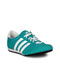

In [4]:
PIL.Image.open(path_to_images[456])

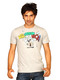

In [5]:
PIL.Image.open(path_to_images[1058])

In [6]:
image = np.array(Image.open(path_to_images[366]))
image.shape

(80, 60, 3)

In [7]:
# Checking for the shape of images
shapes = []
for i in range(len(path_to_images)):
    shapes.append((cv2.imread(path_to_images[i])).shape)
shapes = np.array(shapes)
np.unique(shapes) # Images are of same size

array([ 3, 60, 80])

In [8]:
resized_img = [cv2.imread(path_to_images[i]) for i in range(len(path_to_images))]
x = np.array(resized_img,dtype = 'object') # this are the inputs given to the neural network

In [9]:
x = np.array([])
for i in range(len(path_to_images)):
    x = np.append(x, cv2.imread(path_to_images[i]))
x = (x).reshape((-1,80, 60, 3))
x.shape

(2003, 80, 60, 3)

In [10]:
x = x/255

In [11]:
x[589].shape

(80, 60, 3)

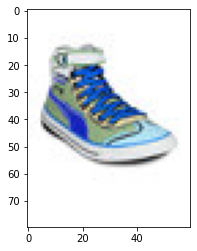

In [12]:
plt.imshow(x[-1])
plt.show()

In [13]:
data = pd.read_excel(r'D:\Data Science\Data Sheets\Codemonk Data\new_data\styles.xlsx')
data.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,Unnamed: 10
0,1163,Men,Apparel,Topwear,Tshirts,Blue,Summer,2011,Sports,Nike Sahara Team India Fanwear Round Neck Jersey,NaN
1,1164,Men,Apparel,Topwear,Tshirts,Blue,Winter,2015,Sports,Nike Men Blue T20 Indian Cricket Jersey,NaN
2,1165,Men,Apparel,Topwear,Tshirts,Blue,Summer,2013,Sports,Nike Mean Team India Cricket Jersey,NaN
3,1525,Unisex,Accessories,Bags,Backpacks,Navy Blue,Fall,2010,Casual,Puma Deck Navy Blue Backpack,NaN
4,1526,Unisex,Accessories,Bags,Backpacks,Black,Fall,2010,Sports,Puma Big Cat Backpack Black,NaN


In [14]:
data = data.iloc[:,:-1]
data.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,1163,Men,Apparel,Topwear,Tshirts,Blue,Summer,2011,Sports,Nike Sahara Team India Fanwear Round Neck Jersey
1,1164,Men,Apparel,Topwear,Tshirts,Blue,Winter,2015,Sports,Nike Men Blue T20 Indian Cricket Jersey
2,1165,Men,Apparel,Topwear,Tshirts,Blue,Summer,2013,Sports,Nike Mean Team India Cricket Jersey
3,1525,Unisex,Accessories,Bags,Backpacks,Navy Blue,Fall,2010,Casual,Puma Deck Navy Blue Backpack
4,1526,Unisex,Accessories,Bags,Backpacks,Black,Fall,2010,Sports,Puma Big Cat Backpack Black


In [15]:
data.isnull().any()

id                    False
gender                False
masterCategory        False
subCategory           False
articleType           False
baseColour            False
season                False
year                  False
usage                 False
productDisplayName    False
dtype: bool

In [16]:
unique_gender = data['gender'].unique()
print('Unique Genders Earlier:-', unique_gender)
data.replace('Boys', 'Men', inplace=True)
data.replace('Girls', 'Women', inplace=True)
unique_gender = data['gender'].unique()
print('Unique Genders After:-', unique_gender)

Unique Genders Earlier:- ['Men' 'Unisex' 'Women' 'Girls' 'Boys']
Unique Genders After:- ['Men' 'Unisex' 'Women']


In [17]:
unique_mastercategory = data['masterCategory'].unique()
unique_mastercategory

array(['Apparel', 'Accessories', 'Footwear', 'Sporting Goods'],
      dtype=object)

In [18]:
unique_articleType = data['articleType'].unique()
print(len(unique_articleType))
unique_articleType

30


array(['Tshirts', 'Backpacks', 'Jackets', 'Caps', 'Sports Shoes',
       'Casual Shoes', 'Footballs', 'Water Bottle', 'Shorts',
       'Track Pants', 'Swimwear', 'Handbags', 'Sweatshirts',
       'Basketballs', 'Sandals', 'Duffel Bag', 'Tops', 'Shirts', 'Capris',
       'Flip Flops', 'Socks', 'Formal Shoes', 'Sports Sandals', 'Heels',
       'Flats', 'Dresses', 'Trousers', 'Headband', 'Belts', 'Skirts'],
      dtype=object)

In [19]:
unique_baseColour = data['baseColour'].unique()
print(len(unique_baseColour))
unique_baseColour

22


array(['Blue', 'Navy Blue', 'Black', 'Red', 'Grey', 'White', 'Orange',
       'Purple', 'Green', 'Pink', 'Brown', 'Silver', 'Beige', 'Yellow',
       'Maroon', 'Cream', 'Tan', 'Olive', 'Gold', 'Multi', 'Peach',
       'Charcoal'], dtype=object)

In [20]:
unique_season = data['season'].unique()
print(len(unique_season))
unique_season

4


array(['Summer', 'Winter', 'Fall', 'Spring'], dtype=object)

In [21]:
total_classes = len(unique_season) + len(unique_baseColour) + len(unique_articleType) + len(unique_gender)
total_classes

59

# Season Prediction Model

In [22]:
season_model = models.Sequential([
    # cnn layer1
    layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape = (80,60,3)),
    layers.BatchNormalization(),
    layers.MaxPool2D((2,2)),

    #cnn layer2
    layers.Conv2D(filters = 64, kernel_size=(4,4), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2,2)),

    #cnn layer3
    layers.Conv2D(filters = 64, kernel_size=(4,4), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2,2)),
    
    # ann
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(unique_season), activation='softmax')])

season_model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
season_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 58, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 78, 58, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 29, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 39, 29, 64)        32832     
                                                                 
 batch_normalization_1 (Batc  (None, 39, 29, 64)       256       
 hNormalization)                                                 
                                                        

In [24]:
data['season'].replace('Summer', 0, inplace=True)
data['season'].replace('Fall', 1, inplace=True)
data['season'].replace('Winter' , 2, inplace=True)
data['season'].replace('Spring', 3, inplace=True)

In [29]:
y_season = to_categorical(data['season'][2:])
y_season

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [30]:
x_train_season, x_test_season, y_train_season , y_test_season = train_test_split(x, y_season, test_size=0.33)

In [31]:
season_model.fit(x_train_season, y_train_season, epochs=10)

Epoch 1/10
42/42 [==============================] - 12s 269ms/step - loss: 1.7257 - accuracy: 0.5604
Epoch 2/10
42/42 [==============================] - 11s 272ms/step - loss: 0.8644 - accuracy: 0.6379
Epoch 3/10
42/42 [==============================] - 12s 274ms/step - loss: 0.7741 - accuracy: 0.6885
Epoch 4/10
42/42 [==============================] - 12s 275ms/step - loss: 0.6626 - accuracy: 0.7265
Epoch 5/10
42/42 [==============================] - 12s 276ms/step - loss: 0.5912 - accuracy: 0.7593
Epoch 6/10
42/42 [==============================] - 12s 283ms/step - loss: 0.4682 - accuracy: 0.8174
Epoch 7/10
42/42 [==============================] - 12s 278ms/step - loss: 0.4319 - accuracy: 0.8249
Epoch 8/10
42/42 [==============================] - 12s 277ms/step - loss: 0.3476 - accuracy: 0.8629
Epoch 9/10
42/42 [==============================] - 12s 279ms/step - loss: 0.2938 - accuracy: 0.8920
Epoch 10/10
42/42 [==============================] - 12s 288ms/step - loss: 0.2677 - accura

In [32]:
season_model.evaluate(x_test_season, y_test_season)

21/21 [==============================] - 2s 62ms/step - loss: 1.1982 - accuracy: 0.6278


[1.1982260942459106, 0.6278365850448608]

# Gender Prediction Model

In [33]:
gender_model = models.Sequential([
    # cnn layer1
    layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape = (80,60,3)),
    layers.BatchNormalization(),
    layers.MaxPool2D((2,2)),

    #cnn layer2
    layers.Conv2D(filters = 64, kernel_size=(4,4), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2,2)),

    #cnn layer3
    layers.Conv2D(filters = 64, kernel_size=(4,4), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2,2)),
    
    # ann
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(unique_gender), activation='softmax')])

gender_model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [34]:
gender_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 78, 58, 32)        896       
                                                                 
 batch_normalization_3 (Batc  (None, 78, 58, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 39, 29, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 39, 29, 64)        32832     
                                                                 
 batch_normalization_4 (Batc  (None, 39, 29, 64)       256       
 hNormalization)                                                 
                                                      

In [35]:
data['gender'].replace('Men', 0, inplace=True)
data['gender'].replace('Women', 1, inplace=True)
data['gender'].replace('Unisex' , 2, inplace=True)

In [38]:
y_gender = to_categorical(data['gender'][2:])
y_gender

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [39]:
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(x, y_gender, test_size=0.33)

In [40]:
gender_model.fit(x_train_gender, y_train_gender, epochs = 10)

Epoch 1/10
42/42 [==============================] - 14s 300ms/step - loss: 1.5876 - accuracy: 0.6207
Epoch 2/10
42/42 [==============================] - 13s 301ms/step - loss: 0.7239 - accuracy: 0.7198
Epoch 3/10
42/42 [==============================] - 12s 277ms/step - loss: 0.6602 - accuracy: 0.7399
Epoch 4/10
42/42 [==============================] - 12s 275ms/step - loss: 0.6368 - accuracy: 0.7414
Epoch 5/10
42/42 [==============================] - 12s 276ms/step - loss: 0.5432 - accuracy: 0.7779
Epoch 6/10
42/42 [==============================] - 12s 281ms/step - loss: 0.4669 - accuracy: 0.8189
Epoch 7/10
42/42 [==============================] - 12s 282ms/step - loss: 0.4268 - accuracy: 0.8256
Epoch 8/10
42/42 [==============================] - 12s 283ms/step - loss: 0.3431 - accuracy: 0.8666
Epoch 9/10
42/42 [==============================] - 12s 289ms/step - loss: 0.2663 - accuracy: 0.8949
Epoch 10/10
42/42 [==============================] - 12s 282ms/step - loss: 0.2191 - accura

In [41]:
gender_model.evaluate(x_test_gender, y_test_gender)

21/21 [==============================] - 2s 63ms/step - loss: 1.0584 - accuracy: 0.5930


[1.0583860874176025, 0.5930408239364624]

# Base-color Prediction Model

In [42]:
color_model = models.Sequential([
    # cnn layer1
    layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape = (80,60,3)),
    layers.BatchNormalization(),
    layers.MaxPool2D((2,2)),

    #cnn layer2
    layers.Conv2D(filters = 64, kernel_size=(5,5), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2,2)),

    #cnn layer3
    layers.Conv2D(filters = 64, kernel_size=(5,5), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2,2)),
    
    #cnn layer4
    layers.Conv2D(filters = 64, kernel_size=(5,5), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2,2)),
    
    # ann
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(unique_baseColour), activation='softmax')])

color_model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [43]:
color_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 78, 58, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 78, 58, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 39, 29, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 39, 29, 64)        51264     
                                                                 
 batch_normalization_7 (Batc  (None, 39, 29, 64)       256       
 hNormalization)                                                 
                                                      

In [44]:
for i in range(len(unique_baseColour)):
    data['baseColour'].replace(f'{unique_baseColour[i]}', i, inplace=True)
y_color = to_categorical(data['baseColour'][2:])
y_color

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [45]:
x_train_color, x_test_color, y_train_color, y_test_color = train_test_split(x, y_color, test_size=0.33)

In [46]:
color_model.fit(x_train_color, y_train_color, epochs = 10)

Epoch 1/10
42/42 [==============================] - 14s 300ms/step - loss: 2.7439 - accuracy: 0.1952
Epoch 2/10
42/42 [==============================] - 13s 312ms/step - loss: 2.2739 - accuracy: 0.2794
Epoch 3/10
42/42 [==============================] - 13s 314ms/step - loss: 2.1800 - accuracy: 0.2802
Epoch 4/10
42/42 [==============================] - 13s 313ms/step - loss: 2.0733 - accuracy: 0.2988
Epoch 5/10
42/42 [==============================] - 13s 316ms/step - loss: 1.9521 - accuracy: 0.3398
Epoch 6/10
42/42 [==============================] - 13s 315ms/step - loss: 1.8436 - accuracy: 0.3733
Epoch 7/10
42/42 [==============================] - 14s 322ms/step - loss: 1.6585 - accuracy: 0.4218
Epoch 8/10
42/42 [==============================] - 13s 316ms/step - loss: 1.4757 - accuracy: 0.4940
Epoch 9/10
42/42 [==============================] - 13s 315ms/step - loss: 1.1903 - accuracy: 0.6021
Epoch 10/10
42/42 [==============================] - 14s 323ms/step - loss: 0.9822 - accura

In [47]:
color_model.evaluate(x_test_color, y_test_color) # worked bad

21/21 [==============================] - 2s 81ms/step - loss: 4.8020 - accuracy: 0.2042


[4.802023887634277, 0.2042360007762909]

# Article-type Prediction Model

In [48]:
article_model = models.Sequential([
    # cnn layer1
    layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape = (80,60,3)),
    layers.BatchNormalization(),
    layers.MaxPool2D((2,2)),

    #cnn layer2
    layers.Conv2D(filters = 64, kernel_size=(5,5), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2,2)),

    #cnn layer3
    layers.Conv2D(filters = 64, kernel_size=(5,5), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2,2)),
    
    #cnn layer4
    layers.Conv2D(filters = 64, kernel_size=(5,5), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2,2)),
    
    # ann
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(unique_articleType), activation='softmax')])

article_model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [49]:
article_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 78, 58, 32)        896       
                                                                 
 batch_normalization_10 (Bat  (None, 78, 58, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 39, 29, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 39, 29, 64)        51264     
                                                                 
 batch_normalization_11 (Bat  (None, 39, 29, 64)       256       
 chNormalization)                                                
                                                      

In [50]:
for i in range(len(unique_articleType)):
    data['articleType'].replace(f'{unique_articleType[i]}', i, inplace=True)
y_article = to_categorical(data['articleType'][2:])
y_article

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [51]:
x_train_article, x_test_article, y_train_article, y_test_article = train_test_split(x, y_article, test_size=0.33)

In [52]:
article_model.fit(x_train_article, y_train_article, epochs=10)

Epoch 1/10
42/42 [==============================] - 14s 293ms/step - loss: 1.9524 - accuracy: 0.5507
Epoch 2/10
42/42 [==============================] - 14s 332ms/step - loss: 1.4239 - accuracy: 0.6230
Epoch 3/10
42/42 [==============================] - 14s 332ms/step - loss: 1.2498 - accuracy: 0.6520
Epoch 4/10
42/42 [==============================] - 13s 315ms/step - loss: 1.0808 - accuracy: 0.6781
Epoch 5/10
42/42 [==============================] - 13s 313ms/step - loss: 0.9534 - accuracy: 0.6997
Epoch 6/10
42/42 [==============================] - 14s 321ms/step - loss: 0.7611 - accuracy: 0.7608
Epoch 7/10
42/42 [==============================] - 13s 319ms/step - loss: 0.6006 - accuracy: 0.8070
Epoch 8/10
42/42 [==============================] - 13s 316ms/step - loss: 0.4535 - accuracy: 0.8554
Epoch 9/10
42/42 [==============================] - 16s 392ms/step - loss: 0.3978 - accuracy: 0.8689
Epoch 10/10
42/42 [==============================] - 14s 328ms/step - loss: 0.3703 - accura

In [53]:
article_model.evaluate(x_test_article, y_test_article)

21/21 [==============================] - 2s 76ms/step - loss: 2.5149 - accuracy: 0.5068


[2.5148558616638184, 0.5068078637123108]

# Combined Model

In [54]:
y = np.concatenate([y_season, y_gender, y_color, y_article], axis = 1)
y.shape

(2003, 59)

In [55]:
def Combined_Model(x):
    plt.subplot()
    plt.imshow(x[0,:, :, :])
    plt.show()
    #Predicting Color
    season_labels = ['Summer', 'Fall', 'Winter', 'Spring']
    season_prediction = np.argmax(season_model.predict(x)[0])
    # Predicting Gender
    gender_labels = ['Men', 'Women', 'Unisex']
    gender_prediction = np.argmax(gender_model.predict(x)[0])
    # Predicting Article-type
    article_prediction = np.argmax(article_model.predict(x)[0])
    #Predicting Color
    color_predictions = np.argmax(color_model.predict(x)[0])
    print(season_labels[season_prediction], unique_baseColour[color_predictions], gender_labels[gender_prediction], 
          unique_articleType[article_prediction])
    return 0

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

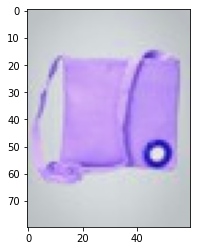

1/1 [==============================] - 0s 113ms/step
Winter Black Women Flats


0

In [57]:
Combined_Model(x_test[0].reshape((-1, 80,60,3)))

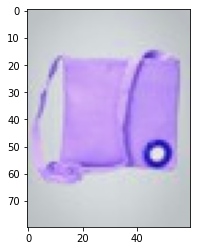

1/1 [==============================] - 0s 21ms/step
Winter Black Women Flats


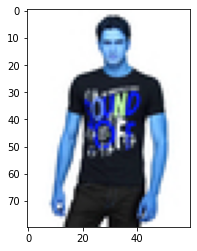

1/1 [==============================] - 0s 23ms/step
Summer Black Men Tshirts


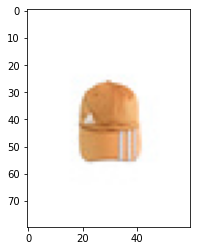

1/1 [==============================] - 0s 22ms/step
Fall White Men Flip Flops


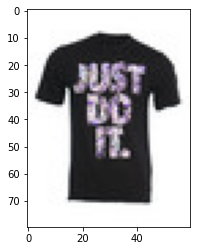

1/1 [==============================] - 0s 21ms/step
Fall Black Women Tshirts


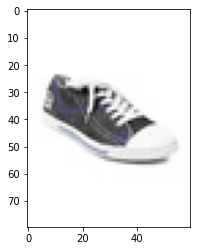

1/1 [==============================] - 0s 22ms/step
Summer Grey Men Flip Flops


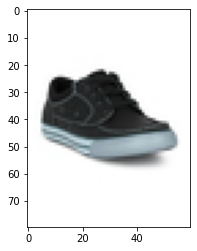

1/1 [==============================] - 0s 26ms/step
Summer Black Men Casual Shoes


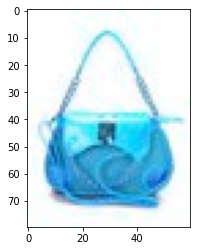

1/1 [==============================] - 0s 20ms/step
Winter Black Women Handbags


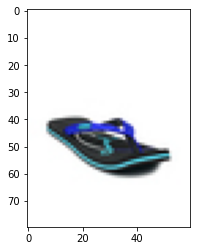

1/1 [==============================] - 0s 22ms/step
Fall Black Women Heels


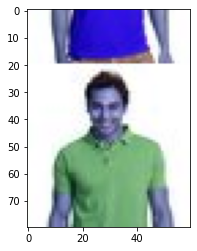

1/1 [==============================] - 0s 21ms/step
Spring Black Men Tshirts


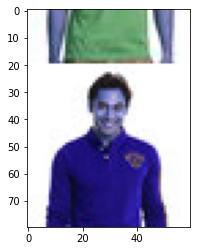

1/1 [==============================] - 0s 19ms/step
Spring Black Men Tshirts


In [58]:
for i in range(10):
    Combined_Model(x_test[i].reshape((-1,80,60,3)))